In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


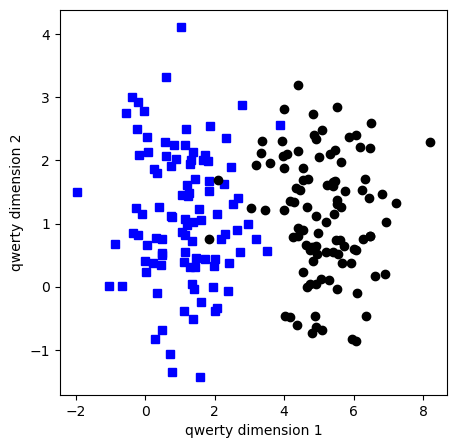

In [2]:
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [3]:
def createModel(lr):
    ANNclassify = nn.Sequential(
      nn.Linear(2,16),  # input layer
      # nn.ReLU(),        # activation unit
      nn.Linear(16,1),  # hidden layer
      # nn.ReLU(),        # activation unit
      nn.Linear(1,1),   # output unit
      nn.Sigmoid(),     # final activation unit
    )

    lossFun = nn.BCELoss()

    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr = lr)
    return ANNclassify,lossFun,optimizer

In [4]:
numEpochs = 1000

def trainModel(ANNmodel,lossFun,optimizer):
    losses = torch.zeros(numEpochs)
    for epochi in range(numEpochs):
        yHat = ANNmodel(data)
        
        loss = lossFun(yHat,labels)
        losses[epochi] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNmodel(data)
    
    totalAcc = 100*torch.mean(((predictions>.5)==labels).float())

    return losses,predictions,totalAcc


97.5


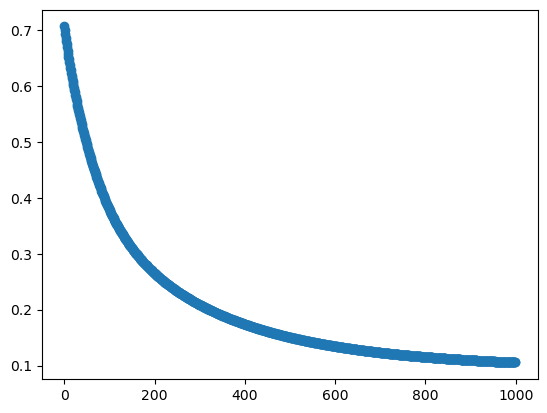

In [5]:
ANNtest,lossFun,optimizer = createModel(0.01)

losses,prediction,totalAcc = trainModel(ANNtest,lossFun,optimizer)

print(totalAcc.item())

plt.plot(losses.detach(),'o')
plt.show()

In [19]:
def experiment():

    accByLr = []
    allLosses = np.zeros((40,numEpochs))
    for i,lr in enumerate(learningRates):
        ANNmodeli,lossFun,optimizer = createModel(lr)
        losses,predictions,totalAcc = trainModel(ANNmodeli,lossFun,optimizer)
    
        accByLr.append(totalAcc)
        allLosses[i,:] = losses.detach()
    return accByLr,allLosses

learningRates = np.linspace(0.001,0.1,40)
accByLr,allLosses = experiment()
    

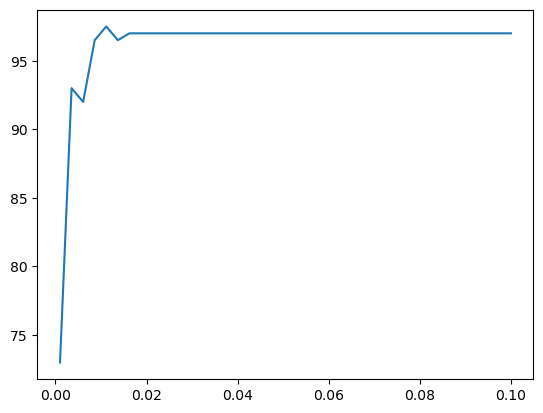

In [21]:
plt.plot(learningRates,accByLr)
plt.show()

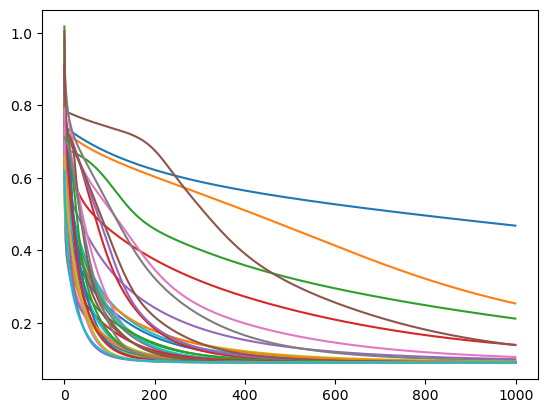

In [23]:
plt.plot(allLosses.T)
plt.show()

In [25]:
sum(torch.tensor(accByLr)>70)/len(accByLr)

tensor(1.)